# Exp4: 基于K-近邻的车牌号识别

## 一、案例简介

图像的智能处理一直是人工智能领域广受关注的一类技术，代表性的如人脸识别与 CT 肿瘤识别，在人工智能落地的进程中发挥着重要作用。其中车牌号识别作为一个早期应用场景，已经融入日常生活中，为我们提供了诸多便利，在各地的停车场和出入口都能看到它的身影。车牌号识别往往分为字符划分和字符识别两个子任务，本案例我们将关注字符识别的任务，尝试用 K-NN 的方法对分割好的字符图像进行自动识别和转化。

## 二、作业说明

### 基本要求
* 完成数据的读入和表示，将图片表示成向量并和 label 对应上；
* 构建 K-NN 模型（可调库）对测试集中的图片进行预测并计算准确率；
* 分析当 K 取不同值时测试准确率的变化。

### 扩展要求
* 分析不同距离度量方式对模型效果的影响；
* 对比平权和加权 K-NN 的效果；
* 分析训练集大小对测试结果的影响。

## 三、数据概览
本次我们使用已经分割好的车牌图片作为数据集，包括数字 0-9、字母 A-Z（不包含 O 和 I）以及省份简称共 65 个类，编号从 0 到 64。数据已经分成了训练集和测试集，里面的文件夹用 label 编号命名，一个文件夹下的所有图片都属于该文件夹对应的类，每个图片都是 20 * 20 的二值化灰度图。

下面演示一下如何借助 PIL 库将图片转化为向量：

In [1]:
from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片

In [2]:
img = img.point(lambda x:1 if x > 100 else 0)

In [3]:
import numpy as np
pixels = np.array(img)  # 转化为 numpy 矩阵
pixels

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0,

## 四、模型构建
（待完成）

#### 读取数据

In [4]:
import os
def load_dataset(path):
    image_data = []; label_arr = []
    dirs = os.listdir(path)
    for dr in dirs:
        if dr.startswith("."):
            continue
        dr_path = path+"/"+dr
        for file in os.listdir(dr_path):
            image = Image.open("%s/%s"%(dr_path, file))
            pixels = np.array(image).flatten() #将20*20展开为1*400
            image_data.append(pixels)
            label_arr.append(dr)
    return np.array(image_data), np.array(label_arr)

In [5]:
train_x, train_y = load_dataset('./data/train')

In [6]:
train_x[0]

array([  2,   1,   0,   0,   1,   0,   1,   1,   0,   5,   1,   0,   4,
         0,   5,   0,   0,   0,   0,   0,   0,   2,   0,   1,   1,   1,
       128,  48,   2,   1,   2,   5,   0,   1,   3,   0,   0,   0,   0,
         0,   3,   0,   0,   1,   0,   0, 255,  96,   2,   0,   0, 221,
       141,   1,   0,   4,   0,   0,   0,   0,   2,   3,   0,   1,   2,
         0, 254,  93,   0,   5,   0, 255, 155,   4,   0,   3,   0,   0,
         0,   0,   1,   0,   6,   2,   0,   3, 255, 100,   2,   2,   0,
       255, 160,   0,   1,   0,   0,   0,   0,   0,   1,   0,   1,   0,
         4,   0, 254, 242,   7,   0,   1, 255, 158,   0,   2,   5,   0,
         0,   0,   0,   0,   4,   2,   0, 148, 255, 255, 255, 255, 255,
       254, 255, 252, 255,  68,   0,   0,   0,   0,   0,   3,   1,   0,
         4, 144, 254, 255, 252, 255, 255, 255, 253, 255, 254,  85,   0,
         0,   0,   0,   0,   0,   2,   0,   2,   6,   6, 255,  97,   5,
         7,   5, 252, 165,   5,   2,   0,   0,   0,   0,   0,   

In [7]:
print(train_x.shape)
print(train_y.shape)

(15954, 400)
(15954,)


In [8]:
test_x, test_y = load_dataset('./data/test')

### 构建KNN模型

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

In [10]:
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [11]:
test_pred = knn.predict(test_x)
accuracy_score(test_pred,test_y)

0.6968917470525188

### 分析不同k取值准确率

In [12]:
ks = [1, 3, 5, 7, 10, 15]
def compare_k(train_x, train_y, test_x, test_y):
    accurays = []
    for k in ks:
        clf = KNeighborsClassifier(k)
        clf.fit(train_x, train_y)
        accurays.append(accuracy_score(clf.predict(test_x), test_y))
    return accurays

In [13]:
accurays = compare_k(train_x, train_y, test_x, test_y)
print(accurays)

[0.7168274383708467, 0.7031082529474812, 0.6968917470525188, 0.6956055734190782, 0.6911039657020365, 0.677599142550911]


<AxesSubplot:>

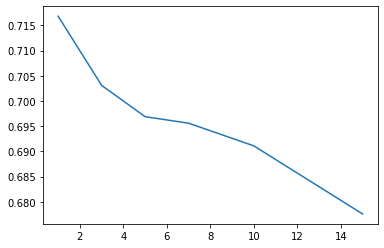

In [14]:
import seaborn as sns
sns.lineplot(x=ks, y=accurays)

### 特征工程

In [15]:
train_x

array([[2, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [16]:
new_train_x = np.int64(train_x > 30)
new_test_x = np.int64(test_x > 30)

In [17]:
accurays = compare_k(new_train_x, train_y, new_test_x, test_y)
print(accurays)

[0.7702036441586281, 0.7444801714898178, 0.7279742765273312, 0.7106109324758842, 0.7003215434083602, 0.6866023579849947]


<AxesSubplot:>

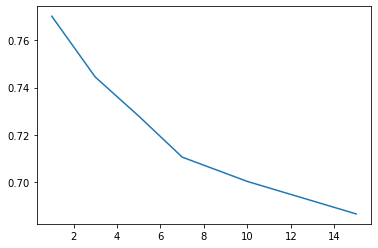

In [18]:
sns.lineplot(x=ks, y=accurays)

### 比较不同距离度量方式

In [36]:
ps = [1, 2]
accurays = []
for p in ps:
    clf = KNeighborsClassifier(n_neighbors=1, p=p)
    clf.fit(new_train_x, train_y)
    accurays.append(accuracy_score(clf.predict(new_test_x), test_y))

In [37]:
accurays

[0.7702036441586281, 0.7702036441586281]

In [34]:
def mydist(x1, x2):
    return len(np.nonzero(x1 - x2)[0])

In [35]:
clf = KNeighborsClassifier(n_neighbors=1, metric=mydist)
clf.fit(new_train_x, train_y)
accuracy_score(clf.predict(new_test_x), test_y)

0.7702036441586281

### 比较加权和平均影响

In [39]:
weights = ['uniform', 'distance']
accurays = []
for w in weights:
    clf = KNeighborsClassifier(weights=w)
    clf.fit(new_train_x, train_y)
    accurays.append(accuracy_score(clf.predict(new_test_x), test_y))

In [40]:
accurays

[0.7279742765273312, 0.7341907824222936]

### 寻找最佳参数


In [43]:
from sklearn.model_selection import cross_val_score, KFold
result = {}
for k in range(1,15):
    for w in weights:
        clf = KNeighborsClassifier(k, weights=w)
        res = cross_val_score(clf, new_train_x, train_y, scoring='accuracy', cv=KFold(n_splits=5, shuffle=True, random_state=2022)).mean()
        result[w+str(k)] = res

In [50]:
list(result)[np.array(list(result.values())).argmax()]

'distance2'

In [59]:
clf = KNeighborsClassifier(2, weights='distance')
clf.fit(new_train_x, train_y)
accuracy_score(clf.predict(new_test_x), test_y)

0.7732047159699893